# constructing 2D/3D local box using GeoPoints.jl 

Nobuaki Fuji (IPGP/UPC/IUF) December 2025

you can also see how to use lazyProduceOrLoad, which is not safe solution but when debugging, it's cool! (but don't write a biiiig jdl2 neither!)

In [1]:
using Pkg

cd(@__DIR__)
Pkg.activate("../")
ParamFile = "../config/testparam.csv"

include("../src/commonBatchs.jl")
include("../src/planet1D.jl")
include("../src/GeoPoints.jl")

using .commonBatchs, .planet1D, .GeoPoints

  Activating 

  1.769353 seconds (3.84 M allocations: 173.764 MiB, 1.13% gc time, 99.92% compilation time)


project at `~/Documents/Github/flexOPT`


In [2]:
set_default_planet!(:Earth) # if you wish to go to other telluric bodies, otherwise this is not necessary

Ellipsoid(Earth)

In [3]:
# two (extreme) points that can define the slice (or the x-y local plane for 3D box)
p1 = GeoPoint(48.8566,2.3522) # Paris (latitude, longitude)
p2 = GeoPoint(42.8,1.5) # Tarascon (à peu près)


Δx = 100.0 # in metre
Δz = 100.0

altMax = 10.e3 # in metre
altMin = -100.e3 # in metre

# altMax and altMin are measured from the middle point at p1 and p2 (but the planet's surface normally), the user can change the option hidden in constructLocalBox

-100000.0

In [4]:
@show p1 # GeoPoint has some attributes

p1 = GeoPoint(48.8566, 2.3522, 0.0, [4.200914795649138e6, 172559.77631070156, 4.780081341967356e6], 6.366053693814456e6)


GeoPoint(48.8566, 2.3522, 0.0, [4.200914795649138e6, 172559.77631070156, 4.780081341967356e6], 6.366053693814456e6)

In [5]:
# make a box/rectangle

allGridsInGeoPoints, allGridsInCartesian, effectiveRadii=constructLocalBox(p1,p2,Δx,Δz,altMin,altMax)
#allGridsInGeoPoints, allGridsInCartesian, effectiveRadii=lazyProduceOrLoad("boxGrids",constructLocalBox,p1,p2,Δx,Δz,altMin,altMax) <- don't do this, it's too heavy


(GeoPoint[GeoPoint(48.902921501041355, 2.3590224318717534, -89745.1594792945, [4.1380740743336356e6, 170472.05638725864, 4.7158373711397825e6], 6.276291889142796e6) GeoPoint(48.9028695608542, 2.359014732850996, -89645.32331843738, [4.1381439556224435e6, 170474.37821651908, 4.715908863898741e6], 6.276391743962576e6) … GeoPoint(48.846817661391015, 2.3507151908714294, 19977.871839904237, [4.214873610733294e6, 173023.74674448266, 4.794407913234886e6], 6.3860350774077885e6) GeoPoint(48.84676748811989, 2.3507077697726615, 20077.71358180186, [4.214943492022102e6, 173026.06857374308, 4.794479405993844e6], 6.386134937177936e6); GeoPoint(48.90201580658621, 2.358879698228112, -89750.88059870013, [4.1381455109377312e6, 170464.6729623241, 4.715767784527338e6], 6.276286503340023e6) GeoPoint(48.90196388072739, 2.358872001748998, -89651.04434692362, [4.138215392226539e6, 170466.99479158456, 4.715839277286297e6], 6.276386358245488e6) … GeoPoint(48.84592744594503, 2.3505751970690194, 19972.248929444777,

In [6]:
allGridsInCartesian[20,30]

localCoord2D(Integer[20, 30], [-336148.5156153419, -97100.0], [0.9985657371009425, 0.05353941247391099], [-0.053539412473905104, 0.9985657371008327])

In [11]:
#seismicModel=getParamsAndTopo(allGridsInGeoPoints,effectiveRadii,2.0) # this can be also GPUed
seismicModel=lazyProduceOrLoad("seismicModel",getParamsAndTopo,allGridsInGeoPoints,effectiveRadii,2.0)
#seismicModel=lazyProduceOrLoad("seismicModel") # this is the laziest way to load

Computing seismicModel


┌ Info: File /Users/nobuaki/Documents/Github/flexOPT/data/topoViaGMT/topoViaGMT_bfb6cd16.jld2 does not exist. Producing it now...
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_files.jl:106
┌ Warning: The Git repository ('/Users/nobuaki/Documents/Github/flexOPT') is dirty! Appending -dirty to the commit ID.
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_tools.jl:71
┌ Info: File /Users/nobuaki/Documents/Github/flexOPT/data/topoViaGMT/topoViaGMT_bfb6cd16.jld2 saved.
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_files.jl:115


(ρ = [3.373638950281932 3.3736498088987372 … 0.0 0.0; 3.373638328544274 3.373649187170389 … 0.0 0.0; … ; 3.3733922132521563 3.3734030718802077 … 0.0 0.0; 3.373392762364162 3.373403620982897 … 0.0 0.0], Vpv = [7.9479448629910285 7.948058059836924 … 0.0 0.0; 7.947938381618389 7.948051578561335 … 0.0 0.0; … ; 7.94537272567023 7.945485922633359 … 0.0 0.0; 7.9453784499487625 7.945491646814775 … 0.0 0.0], Vph = [8.142909418315625 8.142981827913417 … 0.0 0.0; 8.14290527232037 8.142977681980245 … 0.0 0.0; … ; 8.141264077163285 8.141336486836071 … 0.0 0.0; 8.141267738861655 8.141340148472317 … 0.0 0.0], Vsv = [4.411092184829838 4.411069165942278 … 0.0 0.0; 4.411093502834654 4.411070483927359 … 0.0 0.0; … ; 4.411615235974125 4.411592217062726 … 0.0 0.0; 4.411614071926462 4.411591053034812 … 0.0 0.0], Vsh = [4.553096623529719 4.553186290236021 … 0.0 0.0; 4.553091489434927 4.553181156218107 … 0.0 0.0; … ; 4.551059154376851 4.551148821176018 … 0.0 0.0; 4.551063688754094 4.551153355476332 … 0.0 0.0]

In [12]:
Nx,Nz=size(seismicModel.ρ)

(6761, 1101)

In [13]:
maximum(seismicModel.ρ)

3.3807411230672666

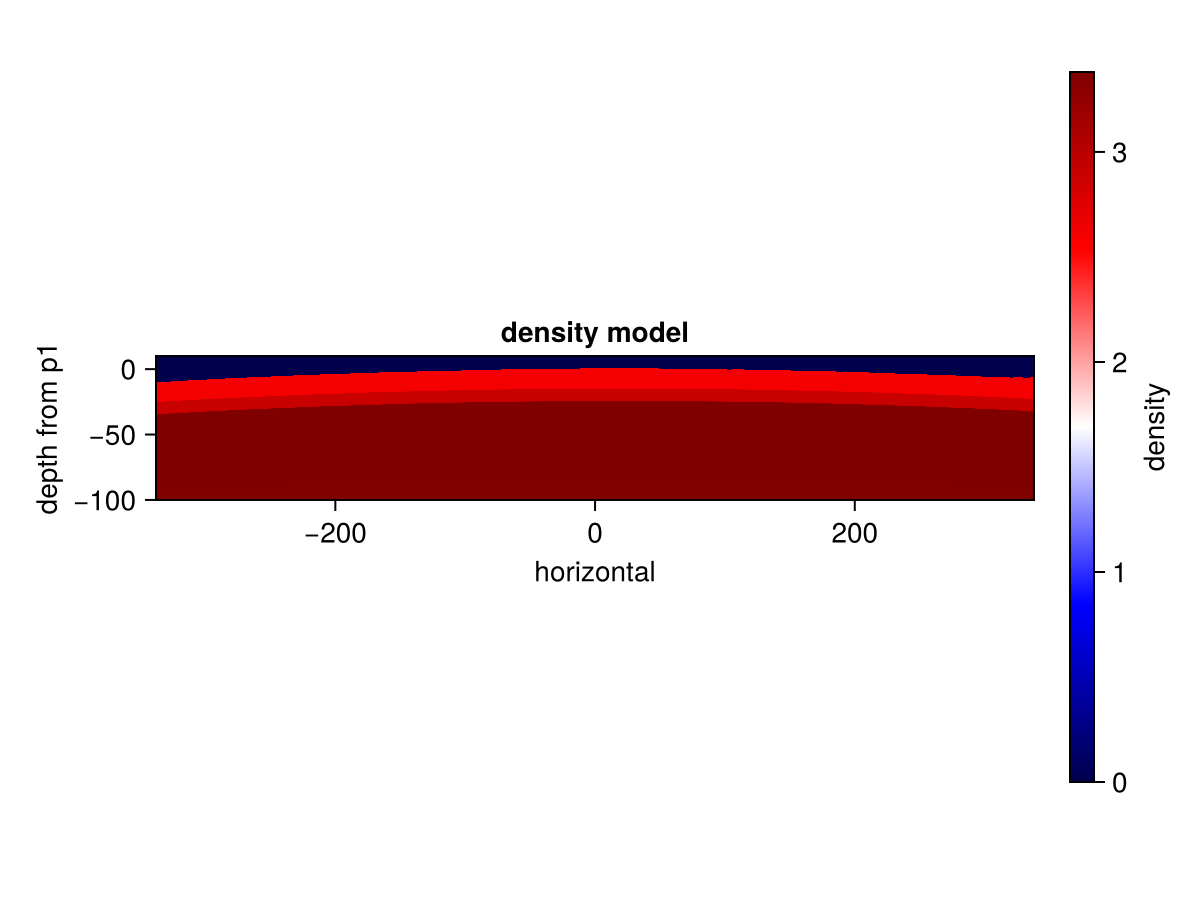

In [23]:
using CairoMakie
xvals = [p.xz[1] for p in allGridsInCartesian[:,1]]*1.e-3
zvals = [p.xz[2] for p in allGridsInCartesian[1,:]]*1.e-3
fig, ax, hm = heatmap(
    #topo.x,topo.y,topo.z';
    #collect((0:1:(Nx-1)).*Δx).*1.e-3,(collect(0:1:(Nz-1)).*Δz.+altMin).*1.e-3, seismicModel.ρ;
    xvals, zvals, seismicModel.ρ;
    colormap = :seismic,
    #colorrange=(0,4),
    axis = (aspect = DataAspect(), xlabel = "horizontal", ylabel = "depth from p1", title = "density model")
)
Colorbar(fig[1,2], hm, label="density")
fig

# 3D box ? yes

In [24]:
p1 = GeoPoint(48.8566,2.3522) # Paris (latitude, longitude)
p2 = GeoPoint(42.8,1.5) # Tarascon (à peu près)


Δx = 500.0 # in metre
Δy = 500.0
Δz = 500.0

altMax = 20.e3 # in metre
altMin = -100.e3 # in metre

horizontalDepth = 50.e3

50000.0

In [25]:

allGridsInGeoPoints3D, allGridsInCartesian3D, effectiveRadii3D=constructLocalBox(p1,p2,Δx,Δy,Δz,-horizontalDepth,horizontalDepth,altMin,altMax)

#ok 3D box version needs to be GPUed

(GeoPoint[GeoPoint(48.9479851410827, 1.6703991150757993, -89529.29514780823, [4.1362426084025204e6, 120622.04599327437, 4.719246505379267e6], 6.276491071616251e6) GeoPoint(48.947554888586694, 1.677291090103464, -89533.41785366197, [4.1362609230618314e6, 121120.54609721422, 4.719212414036872e6], 6.2764871081788195e6) … GeoPoint(48.85426476604022, 3.0394899083581794, -89568.00029038404, [4.13988722560544e6, 219823.56667730305, 4.712462328242693e6], 6.276487061749142e6) GeoPoint(48.85375282870527, 3.0463562254783705, -89564.22685826132, [4.139905540264751e6, 220322.0667812429, 4.712428236900298e6], 6.276491024717616e6); GeoPoint(48.94345296002495, 1.6697440603572036, -89557.88504888894, [4.1365997914229995e6, 120585.12886860166, 4.718898572317045e6], 6.276464159343293e6) GeoPoint(48.943022741407525, 1.6766354477922125, -89562.00776247848, [4.136618106082311e6, 121083.62897254151, 4.71886448097465e6], 6.276460195888867e6) … GeoPoint(48.8497405224328, 3.038718729442301, -89596.58797515491, 

In [26]:
#seismicModel3D=getParamsAndTopo(allGridsInGeoPoints3D,effectiveRadii3D,2.0)
seismicModel3D=lazyProduceOrLoad("seismicModel3D",getParamsAndTopo,allGridsInGeoPoints3D,effectiveRadii3D,2.0)
#seismicModel3D=lazyProduceOrLoad("seismicModel3D")

Computing seismicModel3D


┌ Info: File /Users/nobuaki/Documents/Github/flexOPT/data/topoViaGMT/topoViaGMT_3479a291.jld2 does not exist. Producing it now...
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_files.jl:106
┌ Warning: The Git repository ('/Users/nobuaki/Documents/Github/flexOPT') is dirty! Appending -dirty to the commit ID.
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_tools.jl:71
┌ Info: File /Users/nobuaki/Documents/Github/flexOPT/data/topoViaGMT/topoViaGMT_3479a291.jld2 saved.
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_files.jl:115


(ρ = [3.3736624030276987 3.373661954868063 … 3.373658246427911 3.3736586571309055; 3.3736592960345138 3.3736588478742178 … 3.3736551396903462 3.3736555503965895; … ; 3.3734132933941345 3.373412846935353 … 3.373409506281914 3.3734099189988465; 3.3734160369943726 3.373415590538767 … 3.3734122501720156 3.3734126628886694;;; 3.37371669439367 3.3737162462682537 … 3.373712537841774 3.373712948510688; 3.3737135876330697 3.373713139506994 … 3.373709431336777 3.373709842008939; … ; 3.3734675850156224 3.373467138590942 … 3.3734637979227493 3.3734642106054324; 3.373470328383142 3.373469881961636 … 3.373466541580108 3.373466954262512;;; 3.3737709857724685 3.373770537681266 … 3.3737668292684573 3.373767239903295; 3.373767879244416 3.373767431152554 … 3.3737637229959896 3.373764133634075; … ; 3.3735218766499018 3.3735214302593164 … 3.373518089576372 3.3735185022248104; 3.3735246197847397 3.373524173397328 … 3.3735208330010256 3.3735212456491857;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 

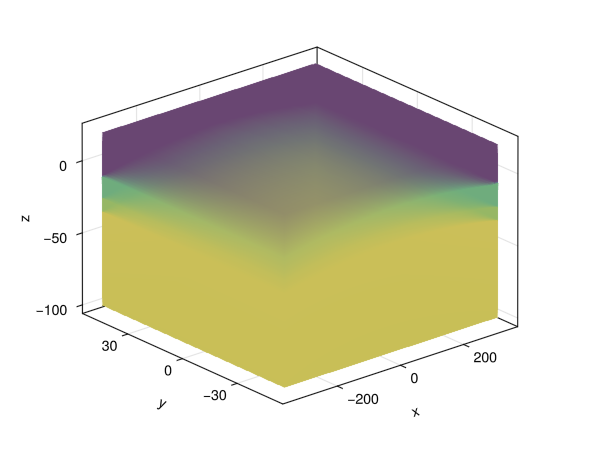

In [28]:
using GLMakie
GLMakie.activate!()
Makie.inline!() 
Nx3D,Ny3D,Nz3D=size(allGridsInCartesian3D)

#x = (0:Nx3D-1) .* Δx .* 1e-3
#y = (0:Ny3D-1) .* Δy .* 1e-3 .- horizontalDepth*1.e-3
#z = (0:Nz3D-1) .* Δz .* 1e-3 .+ altMin*1.e-3

x = [p.xyz[1] for p in allGridsInCartesian3D[:,1,1]]*1.e-3
y = [p.xyz[2] for p in allGridsInCartesian3D[1,:,1]]*1.e-3
z = [p.xyz[3] for p in allGridsInCartesian3D[1,1,:]]*1.e-3
A = seismicModel3D.Vpv

f = Figure()
ax = Axis3(f[1, 1])

volume!(ax,
    x[1] .. x[end],
    y[1] .. y[end],
    z[1] .. z[end],
    seismicModel3D.Vpv,
    algorithm = :absorption,   # optional, makes it nicer
    colormap = :viridis
)
f

# another way of importing model parameters

## we can read images or cartoons

In [29]:
modelName="marmousi"
imageFile="../dataInput/model/random/marmousi.png"
modelDefinitionMethod="2DimageFile" # ToyModel or 2DimageFile (or 1DsphericalPlanet)
model=defineModel(imageFile)

676×802 Matrix{Float64}:
 0.0       0.0       0.0       0.0       …  0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0       …  0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 0.0       0.0       0.0       0.0          0.0       0.0       0.0
 ⋮                                       ⋱            ⋮         
 0.550062  0.550062  0.550062  0.556929     0.666012  0.666012  0.666012
 0.550062  0.550062  0.550062  0.557909     0.666012  0.666012  0.666012
 0.550062  0.550062  0.550062  0.557909     0.666012  0.666012  0.666012
 0.550062  

model construction 

In [ ]:
seismicModelMarmousi = initiateSeismicModel(model)

#constructLocalBox for marmousi models should be written!

# now construction of OPT operators

# Let's go to Mars

In [ ]:
set_default_planet!(:Mars)


# ok i need to change how to call 1D planet models too (because it is already called by DSM1D and it is not very much flexible but here I just use the same params as Earth)

In [ ]:
p1 = GeoPoint(15.0,135.0) # we should see Elysium planitia at least
p2 = GeoPoint(15.0,180.0) # 

In [ ]:
Δx = 3.e3 # in metre
Δy = 3.e3
Δz = 3.e3

horizontalDepthMin = -1000.e3
horizontalDepthMax = 1000.e3


altMax = 100.e3 # in metre
altMin = -600.e3 # in metre



In [ ]:
allGridsInGeoPoints, allGridsInCartesian, effectiveRadii=constructLocalBox(p1,p2,Δx,Δy,Δz,horizontalDepthMin,horizontalDepthMax,altMin,altMax)

In [ ]:
Nx,Ny,Nz=size(allGridsInCartesian)

In [ ]:
seismicModel=getParamsAndTopo(allGridsInGeoPoints,2.0)

In [ ]:
using CairoMakie
fig, ax, hm = heatmap(
    #topo.x,topo.y,topo.z';
    collect((0:1:(Nx-1)).*Δx).*1.e-3,(collect(0:1:(Nz-1)).*Δz.+altMin).*1.e-3, seismicModel.Vsv[:,(Ny÷6)*1,:];
    colormap = :seismic,
    colorrange=(0,15),
    axis = (aspect = DataAspect(), xlabel = "horizontal", ylabel = "depth from p1", title = "Vph model")
)
ylims!(ax,-200,300)
xlims!(ax,0,400)
Colorbar(fig[1,2], hm, label="P-wave")
fig